In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline 

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_csv('data.csv')#读取数据，命名为 data
data.head(5)

,Unnamed: 0,Survived,Sex,Age,SibSp,Parch,Fare,Pc_1,Pc_2,Pc_3,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X
0,0,0,0,22.0,1,0,1.981001,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,38.0,1,0,4.266662,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,26.0,0,0,2.070022,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,3,1,1,35.0,1,0,3.972177,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,35.0,0,0,2.085672,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [4]:
y = data['Survived']
X = data.drop(['Survived'], axis=1).values

classifiers = [AdaBoostClassifier(random_state=2), RandomForestClassifier(random_state=2)]
for clf in classifiers:
    score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')#cv=10：10 折交叉验证法，scoring='accuracy'：返回测试精度
    print([np.mean(score)])#显示测试精度平均值

[0.7353336738168198]
[0.80476364771308584]


## 性能度量

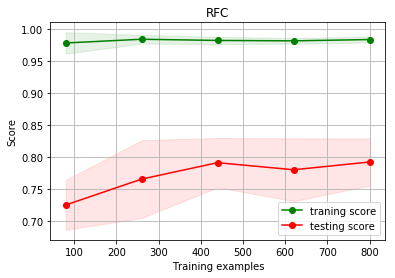

In [5]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):#定义函数 plot_learning_curve 绘制学习曲线。train_sizes 初始化为 array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]),cv 初始化为 10，以后调用函数时不再输入这两个变量
    plt.figure()
    plt.title(title)#设置图的 title
    plt.xlabel('Training examples')#横坐标
    plt.ylabel('Score')#纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes)#使用 10 折交叉验证法，对 train_sizes*m（m为总的样例数目） 个的数据进行训练，返回训练精度 train_scores,测试精度 test_scores 
    train_scores_mean = np.mean(train_scores, axis=1)#计算平均值
    train_scores_std = np.std(train_scores, axis=1)#计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()#设置背景的网格

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g')#设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score')#绘制训练精度曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score')#绘制测试精度曲线
    plt.legend(loc='best')
    return plt

#调用函数 plot_learning_curve 绘制随机森林学习器学习曲线
g = plot_learning_curve(RandomForestClassifier(), 'RFC', X, y)